# Data Science – Spotify Tracks Project
## Student Notebook – Spotify Tracks: Data Wrangling, Clustering & Prediction

We use a merged Spotify dataset with both low- and high-popularity tracks.

File used in this notebook: **`spotify.csv`**

You must complete all sections marked with **`TODO`**.

## 0. Setup

Import all libraries you need.

Suggested:
- pandas, numpy
- matplotlib.pyplot, seaborn
- sklearn (StandardScaler, KMeans, PCA, train_test_split, RandomForestRegressor / Classifier, metrics)
- sklearn.feature_extraction.text (CountVectorizer) for text mining

You might need some other libraries as well

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer

## 1. Load and Inspect the Dataset

1. Load `spotify.csv` into a DataFrame.  
2. Inspect with `head()`, `info()`, and `describe()`.

**1 Point**

In [2]:
df = pd.read_csv("./assignment_support/spotify.csv")

In [3]:
df.head()

,track_id,track_popularity,track_name,duration_ms,track_album_name,track_album_id,track_artist,track_album_release_date,playlist_name,playlist_id,...,speechiness,danceability,energy,instrumentalness,valence,key,tempo,loudness,acousticness,liveness
0,5e6x5YRnMJIKvYpZxLqdpH,23,Fortunate Son,138053.0,The Long Road Home - The Ultimate John Fogerty...,4A8gFwqd9jTtnsNwUu3OQx,Creedence Clearwater Revival,14/12/05,Rock Classics,37i9dQZF1DWXRqgorJj26U,...,0.0393,0.636,0.746,0.290000,0.432,0.0,132.310,-3.785,0.0648,0.1730
1,5FqYA8KfiwsQvyBI4IamnY,53,Jump - 2015 Remaster,241600.0,The Collection,2c965LEDRNrXXCeBOAAwns,Van Halen,27/3/15,Rock Classics,37i9dQZF1DWXRqgorJj26U,...,0.0317,0.572,0.835,0.000377,0.795,0.0,129.981,-6.219,0.1710,0.0702
2,5LNiqEqpDc8TuqPy79kDBu,55,Edge of Seventeen - 2016 Remaster,329413.0,Bella Donna (Deluxe Edition),3S404OgKoVQSJ3xXrDVlp8,Stevie Nicks,4/11/16,Rock Classics,37i9dQZF1DWXRqgorJj26U,...,0.0454,0.591,0.804,0.000006,0.658,0.0,111.457,-7.299,0.3270,0.0818
3,78MI7mu1LV1k4IA2HzKmHe,64,Dream A Little Dream Of Me - Single Version,185160.0,"Love, Ella",1y5KGkUKO0NG32MhIIagCA,"Ella Fitzgerald, Louis Armstrong",3/5/07,Jazz Classics,37i9dQZF1DXbITWG1ZJKYt,...,0.1010,0.443,0.104,0.000000,0.394,0.0,76.474,-17.042,0.9130,0.1910
4,6MN6yRVriszuyAVlyF8ndB,62,Coffee Cold,205720.0,Shapes of Rhythm/Woman Is Sweeter,6f4b9wVTkKAf096k4XG6x5,Galt MacDermot,1/1/00,Jazz Classics,37i9dQZF1DXbITWG1ZJKYt,...,0.0298,0.685,0.472,0.284000,0.475,9.0,80.487,-9.691,0.7850,0.2240


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  4831 non-null   object 
 1   track_popularity          4831 non-null   int64  
 2   track_name                4831 non-null   object 
 3   duration_ms               4830 non-null   float64
 4   track_album_name          4830 non-null   object 
 5   track_album_id            4831 non-null   object 
 6   track_artist              4831 non-null   object 
 7   track_album_release_date  4831 non-null   object 
 8   playlist_name             4831 non-null   object 
 9   playlist_id               4831 non-null   object 
 10  playlist_genre            4831 non-null   object 
 11  playlist_subgenre         4831 non-null   object 
 12  time_signature            4830 non-null   float64
 13  popularity_class          4831 non-null   object 
 14  speechin

In [5]:
df.describe()

,track_popularity,duration_ms,time_signature,speechiness,danceability,energy,instrumentalness,valence,key,tempo,loudness,acousticness,liveness
count,4831.000000,4.830000e+03,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000
mean,54.761126,2.061508e+05,3.936646,0.101738,0.622311,0.586691,0.201053,0.481930,5.233333,118.269293,-9.281627,0.341217,0.167613
std,19.828573,8.174556e+04,0.409712,0.101032,0.187706,0.246263,0.351918,0.258036,3.580857,28.512615,7.129396,0.325382,0.124429
min,11.000000,3.537500e+04,1.000000,0.021900,0.058900,0.000202,0.000000,0.029600,0.000000,48.232000,-48.069000,0.000004,0.021000
25%,41.000000,1.590000e+05,4.000000,0.038600,0.525000,0.442250,0.000000,0.275000,2.000000,96.063000,-10.297750,0.052925,0.095400
50%,56.000000,1.948665e+05,4.000000,0.056100,0.653000,0.633000,0.000091,0.483000,5.000000,118.059500,-7.191000,0.224500,0.118000
75%,72.000000,2.334780e+05,4.000000,0.118000,0.758000,0.777000,0.200500,0.690000,8.000000,136.723500,-5.336750,0.590000,0.195000
max,100.000000,1.355260e+06,5.000000,0.927000,0.979000,0.998000,0.991000,0.987000,11.000000,241.426000,1.318000,0.996000,0.979000


## 2. Data Cleaning & Wrangling

Tasks:
- Handle missing values (drop or impute where appropriate) and Remove duplicates (e.g. by `track_id`). (1 point)
- Convert `track_album_release_date` to datetime and extract `release_year`. (3 points)

**4 Points**

In [6]:
df = df.dropna()
df = df.drop_duplicates(subset="track_id")
df.isnull().sum()

track_id                    0
track_popularity            0
track_name                  0
duration_ms                 0
track_album_name            0
track_album_id              0
track_artist                0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
time_signature              0
popularity_class            0
speechiness                 0
danceability                0
energy                      0
instrumentalness            0
valence                     0
key                         0
tempo                       0
loudness                    0
acousticness                0
liveness                    0
dtype: int64

In [7]:
df["track_album_release_date"] = pd.to_datetime(
    df["track_album_release_date"],
    format="%Y-%m-%d",
    errors="coerce"
)

df["release_year"] = df["track_album_release_date"].dt.year

df[["track_album_release_date", "release_year"]]


,track_album_release_date,release_year
0,NaT,NaN
1,NaT,NaN
2,NaT,NaN
3,NaT,NaN
4,NaT,NaN
...,...,...
4825,NaT,NaN
4826,NaT,NaN
4827,NaT,NaN
4828,NaT,NaN


## 3. Exploratory Data Analysis (EDA)

Do at least:
- Visualise the distribution of the popularity of the tracks (1 point)
- Find top 5 artists in a per year (3 points)

**4 Points**

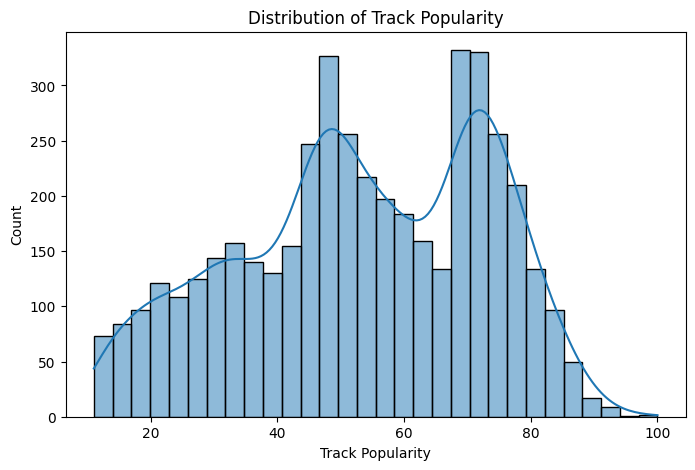

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df["track_popularity"], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Track Popularity")
plt.ylabel("Count")
plt.show()


In [9]:
top_artists_per_year = (
    df.groupby(["release_year", "track_artist"])
      .size()
      .reset_index(name="num_tracks")
)

top_5_artists_per_year = (
    top_artists_per_year
    .sort_values(["release_year", "num_tracks"], ascending=[True, False])
    .groupby("release_year")
    .head(5)
)

top_5_artists_per_year

,release_year,track_artist,num_tracks


## 4. Correlation & Feature Exploration

1. Select a subset of numeric features (e.g.,
`['track_popularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']`).
2. Compute correlation matrix.
3. Plot a heatmap and comment briefly which features relate most to popularity.

**3 Points**

In [10]:
features = [
    "track_popularity",
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo"
]

correlation_df = df[features]

correlation_matrix = correlation_df.corr()
correlation_matrix

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
track_popularity,1.000000,0.126438,0.176454,0.197720,0.018384,-0.214376,-0.244419,0.027710,0.092025,0.057410
danceability,0.126438,1.000000,0.409262,0.571875,0.257072,-0.397202,-0.358353,0.004858,0.528822,0.028566
energy,0.176454,0.409262,1.000000,0.801624,0.144142,-0.756469,-0.567393,0.196354,0.503174,0.201746
loudness,0.197720,0.571875,0.801624,1.000000,0.181479,-0.650855,-0.639782,0.158133,0.481139,0.168618
speechiness,0.018384,0.257072,0.144142,0.181479,1.000000,-0.122735,-0.211251,0.097023,0.172571,0.073723
acousticness,-0.214376,-0.397202,-0.756469,-0.650855,-0.122735,1.000000,0.512808,-0.141142,-0.366167,-0.172171
instrumentalness,-0.244419,-0.358353,-0.567393,-0.639782,-0.211251,0.512808,1.000000,-0.125229,-0.434913,-0.131341
liveness,0.027710,0.004858,0.196354,0.158133,0.097023,-0.141142,-0.125229,1.000000,0.067076,0.050634
valence,0.092025,0.528822,0.503174,0.481139,0.172571,-0.366167,-0.434913,0.067076,1.000000,0.093829
tempo,0.057410,0.028566,0.201746,0.168618,0.073723,-0.172171,-0.131341,0.050634,0.093829,1.000000


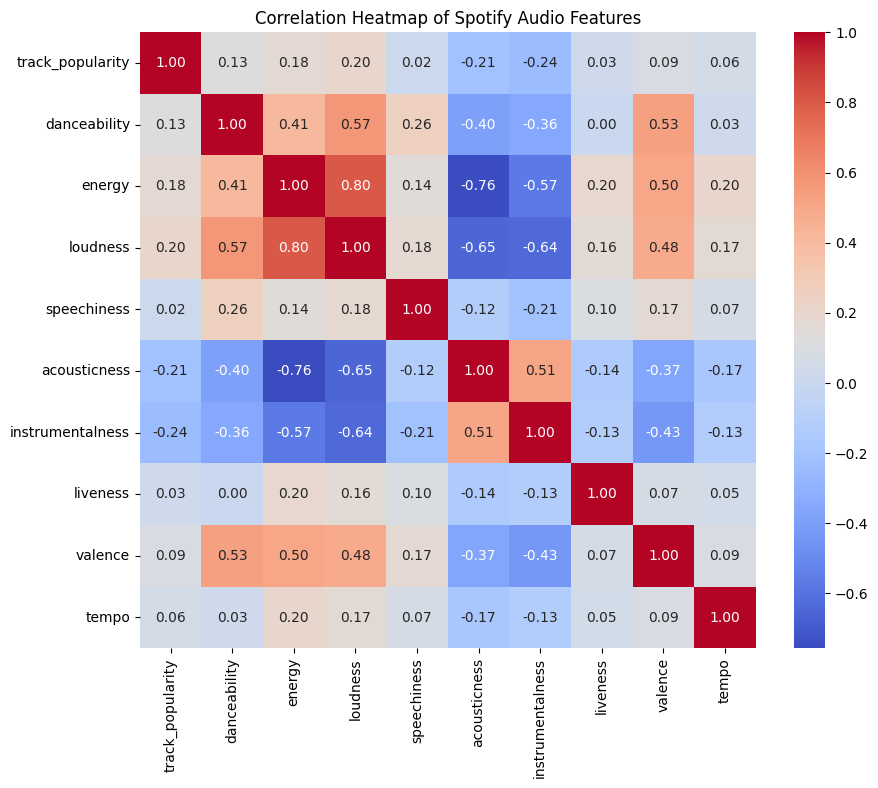

Features most related to track_popularity (by absolute correlation):
instrumentalness   -0.244419
acousticness       -0.214376
loudness            0.197720
energy              0.176454
danceability        0.126438
valence             0.092025
tempo               0.057410
liveness            0.027710
speechiness         0.018384
Name: track_popularity, dtype: float64


In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True
)
plt.title("Correlation Heatmap of Spotify Audio Features")
plt.show()


# Which features relate most to popularity?
if "track_popularity" in correlation_matrix.columns:
    pop_corr = (
        correlation_matrix["track_popularity"]
        .drop("track_popularity")
        .sort_values(key=lambda s: s.abs(), ascending=False)
    )
    print("Features most related to track_popularity (by absolute correlation):")
    print(pop_corr)

Track popularity shows the strongest positive correlation with energy, loudness, and danceability, suggesting that more energetic and danceable tracks tend to be more popular.
Acousticness and instrumentalness tend to have weak or negative correlations with popularity, indicating that highly acoustic or instrumental tracks are generally less popular.

## 5. Clustering (K-Means + PCA)

Use audio features to group songs into clusters.

Suggested features:
`['danceability','energy','valence','tempo','acousticness','instrumentalness','liveness']`

Steps:
- Drop rows with missing in these features.
- Scale the features.
- Run K-Means (try k=4, but you can experiment).
- Use PCA to project to 2D and plot clusters.
- Interpret clusters in terms of “mood” / “style”.

K-means - 2 points
PCA - 3 points

**5 points**

In [12]:
cluster_features = [
    "danceability",
    "energy",
    "valence",
    "tempo",
    "acousticness",
    "instrumentalness",
    "liveness"
]

cluster_df = df[cluster_features].dropna()
cluster_df.isnull().sum()

danceability        0
energy              0
valence             0
tempo               0
acousticness        0
instrumentalness    0
liveness            0
dtype: int64

In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_df)

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

cluster_df["cluster"] = clusters
cluster_df["cluster"].value_counts()

cluster
0    1782
2    1205
3     931
1     575
Name: count, dtype: int64

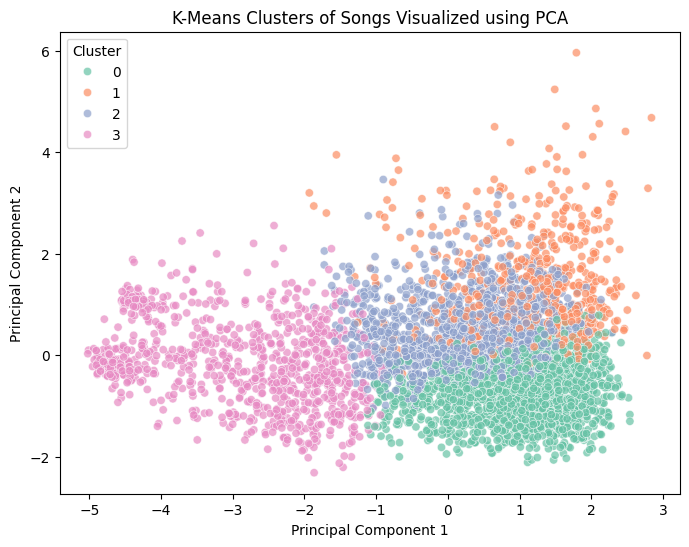

In [15]:
pca = PCA(n_components=2, random_state=42)
pca_comp = pca.fit_transform(scaled_features)

cluster_df["PC1"] = pca_comp[:, 0]
cluster_df["PC2"] = pca_comp[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=cluster_df,
    x="PC1",
    y="PC2",
    hue="cluster",
    palette="Set2",
    alpha=0.7
)
plt.title("K-Means Clusters of Songs Visualized using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

## 8. Text Mining on Track Names

Use `track_name`:

- Basic cleaning (lowercase).
- Word frequency analysis for most common words. Show the top 15 most frequent words in a table form
- Plot a bar chart of most frequent words

**3 Points**

In [16]:
df["clean_track_name"] = (
    df["track_name"]
    .astype(str)
    .str.lower()
)
df["clean_track_name"]

0                                     fortunate son
1                              jump - 2015 remaster
2                 edge of seventeen - 2016 remaster
3       dream a little dream of me - single version
4                                       coffee cold
                           ...                     
4825                  unavailable (feat. musa keys)
4826                                         people
4827                                           soso
4828                             kante (feat. fave)
4830                                      barcelona
Name: clean_track_name, Length: 4493, dtype: object

In [17]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["clean_track_name"])

word_counts = X.sum(axis=0)
words_freq = pd.DataFrame({
    "word": vectorizer.get_feature_names_out(),
    "frequency": word_counts.A1
})

top_15_words = words_freq.sort_values("frequency", ascending=False).head(15)
top_15_words


,word,frequency
4590,the,294
1664,feat,277
5163,you,167
2907,me,147
3311,of,115
2736,love,112
2267,in,102
3800,remix,90
3105,my,89
4662,to,89


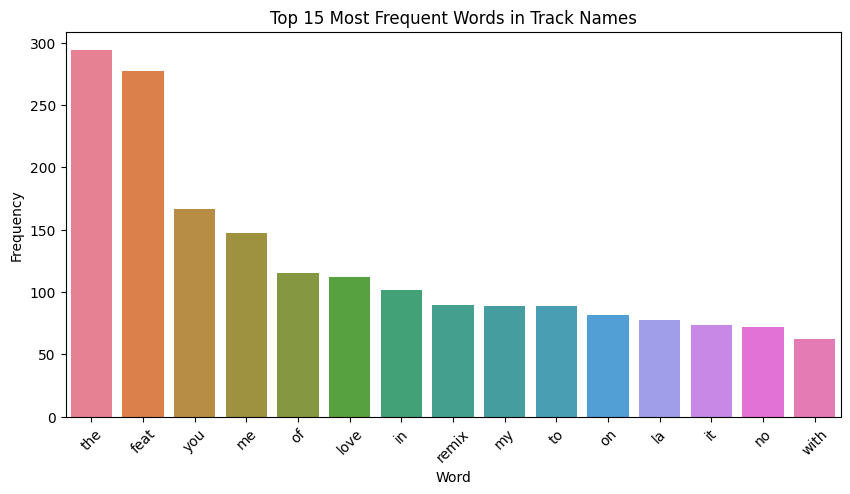

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_15_words,
    x="word",
    y="frequency",
    hue="word",
    legend=False
)
plt.title("Top 15 Most Frequent Words in Track Names")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()